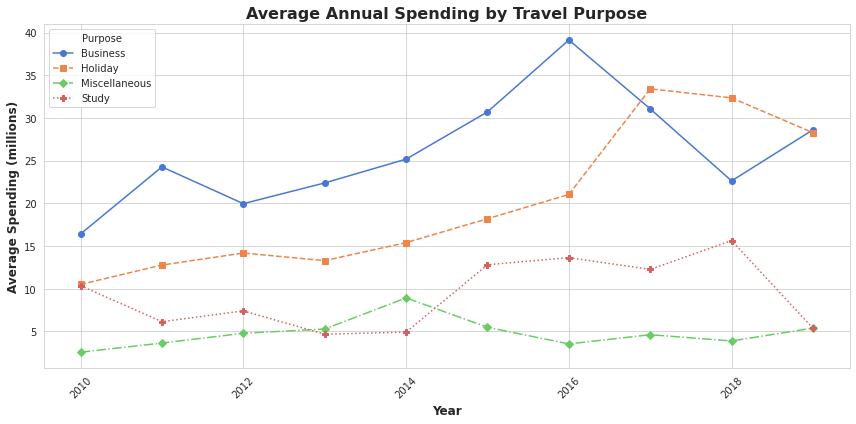

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "usaSmall.csv"
df = pd.read_csv(file_path)

# Grouping data and filtering unecessary variables
df_grouped = df.groupby(['year', 'purpose'])['Spend'].mean().reset_index()
df_grouped = df_grouped[df_grouped['purpose'] != 'VFR']
pivot_df = df_grouped.pivot(index='year', columns='purpose', values='Spend')


sns.set_style("whitegrid")
sns.set_palette("muted")
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', 'P']
style_map = {purpose: (line_styles[i % len(line_styles)], 
                       markers[i % len(markers)]) for i, purpose in enumerate(pivot_df.columns)}

#Plot
plt.figure(figsize=(12, 6))
for purpose in pivot_df.columns:
    linestyle, marker = style_map[purpose]
    plt.plot(pivot_df.index, pivot_df[purpose], linestyle=linestyle, marker=marker, label=purpose)
plt.title("Average Annual Spending by Travel Purpose", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Average Spending (millions)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title="Purpose", fontsize=10, loc='best')
plt.tight_layout()
